In [ ]:
'''
=================================================================================
Nama  : Teguh Sukmanaputra
Batch : RMT-29

Program ini berisi serangkaian metode untuk melaksanakan analisis data science. Diawali dengan pengumpulan/gathering data
menggunakan metode Web Scraping pada sebuah website e-commerce, kemudian data yang terkumpul dilanjutkan pada tahapan Data 
Preparation & Cleaning. Setelahnya, akan dilakukan analisa data berdasarkan Business Knowledge yang tentunya diperkuat dengan
adanya Practical Statistics sebagai penguat argumentasi/hipotesis analisa data.

=================================================================================
'''

## Case

Menjadi seorang yang ingin melakukan usaha dropship produk 'seblak' di platform Tokopedia, namun ingin melakukan riset/analisa pasar terlebih dahulu terkait bagaimana animo masyarakat terhadap produk tersebut dengan melihat tren/tingkat penjualan produk pada laman website e-commerce Tokopedia.

***

## Library

In [49]:
# import package yang dibutuhkan
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

## A. Web Scraping
Dilakukan pengambilan data produk dengan kata kunci "seblak" yang bersumber dari sebuah website e-commerce. Berikut merupakan link unutk akses website tersebut:
<br>
    https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=
<br>
<br>
Adapun data yang akan diambil pada web tersebut diantara nya yaitu: `Nama Produk`, `Harga Produk`, `Penjual`, `Kota Toko`, `Jumlah/Banyaknya Produk yang Terjual`, `dan Rating Produk`.

In [2]:
# menggunakan google chrome sebagai driver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [3]:
# melakukan multiple pages web scraping
nama = []
harga = []
toko = []
kota = []
penjualan = []
rating = []

for i in range(1, 11):
    url = "https://www.tokopedia.com/search?navsource=&page={}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=".format(i)
    driver.get(url)
    time.sleep(5)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    products = soup.find_all('div', class_='css-1asz3by')  # section dari produk regular yang akan di scrape informasinya


    for product in products: # melakukan looping untuk pengambilan data dari section yang telah ditetapkan
        product_name = product.find('div', class_='prd_link-product-name css-3um8ox')
        if product_name:
            nama.append(product_name.get_text())
        else:
            nama.append(None)

        product_price = product.find('div', class_='prd_link-product-price css-h66vau')
        if product_price:
            harga.append(product_price.get_text())
        else:
            harga.append(None)

        shop_name = product.find('span', class_='prd_link-shop-name css-1kdc32b flip')
        if shop_name:
            toko.append(shop_name.get_text())
        else:
            toko.append(None)

        shop_location = product.find('span', class_='prd_link-shop-loc css-1kdc32b flip')
        if shop_location:
            kota.append(shop_location.get_text())
        else:
            kota.append(None)
        
        sales = product.find('span', class_='prd_label-integrity css-1sgek4h')
        if sales:
            penjualan.append(sales.get_text())
        else:
            penjualan.append(None)

        rating_value = product.find('span', class_='prd_rating-average-text css-t70v7i')
        if rating_value:
            rating.append(rating_value.get_text())
        else:
            rating.append(None)

driver.close()

data_multipage = pd.DataFrame()
data_multipage['nama_produk'] = nama
data_multipage['harga_produk'] = harga
data_multipage['toko'] = toko
data_multipage['kota'] = kota
data_multipage['jumlah_penjualan'] = penjualan
data_multipage['rating_produk'] = rating

In [4]:
# cek hasil scraping
data_multipage

,nama_produk,harga_produk,toko,kota,jumlah_penjualan,rating_produk
0,MASJAY Seblak Bumbu Membara Instant - No.1 Str...,Rp15.000,None,None,250+ terjual,4.9
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,None,None,80+ terjual,5.0
2,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,None,None,250+ terjual,4.8
3,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
4,Kerupuk seblak pedas,Rp15.000,MACALONI SNACK,Cimahi,10 terjual,5.0
...,...,...,...,...,...,...
372,SEBRING KRUPUK KERUPUK SEBLAK KERING PEDAS DAU...,Rp16.000,Aydaa Snack,Surakarta,90+ terjual,4.9
373,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
374,kerupuk seblak polos pedas 500gr jajanan cemil...,Rp20.000,pelangi khatulistiwa 2,Surabaya,40+ terjual,4.9
375,seblak basreng pedas original exstra daun jeru...,Rp25.000,Seblak putra bandung,Kab. Bandung,250+ terjual,4.8


* Berdsarkan web scraping yang dilakukan, didapat sebanyak 377 data/records dengan kategori data yang telah ditentukan berdasarkan kolomnya.

In [5]:
# data backup hasil scraping
data_multipage.to_csv('data_backup_scraping.csv')

# dikarenakan website tokopedia yang dinamis, saya berinisiatif untuk menyimpan hasil web scraping menjadi sebuah file csv.
# sehingga, tidak perlu mengulang proses web scraping yang nantinya berkemungkinan dapat berbeda dengan dataset yang telah diolah dan diinterpretasikan. 

***

## B. Data Cleaning & Preparation
Pada bagian ini, dataset hasil scraping yang telah diperoleh akan dibersihkan dan disiapkan untuk dapat dianalisis setelahnya.

In [3]:
# syntax ini digunakan untuk memanggil file csv yang telah di save sebelumnya
# sehingga apabila saya keluar dari VSCode, maka tidak perlu melakukan web scraping dari awal
data_multipage = pd.read_csv('data_backup_webscraping.csv')

In [4]:
# melihat karakteristik umum dari dataframe
data_multipage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nama_produk       377 non-null    object 
 1   harga_produk      377 non-null    object 
 2   toko              350 non-null    object 
 3   kota              350 non-null    object 
 4   jumlah_penjualan  368 non-null    object 
 5   rating_produk     352 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


* Berdasarkan informasi umum ini, dapat diketahui bahwa **terdapat missing values** yang cukup banyak. Hal tersebut terlihat dari perhitungan non-null dari tiap kolomnya dimana pada kolom toko hingga rating_produk memiliki jumlah count yang lebih sedikit dibandingkan kolom nama dan harga produk yang menjadi values acuan. Kemudian, dapat diketahui pula bahwa **tipe data dari tiap kolom masih berupa string/object**, sehingga perlu disesuaikan kembali dengan tujuan datanya, seperti kolom harga_produk, jumlah_penjualan, dan rating_produk yang seharusnya bertipe numeric/angka agar dapat dianalisis secara statistik.

In [5]:
# menghapus baris/rows yang informasinya tidak lengkap
df = data_multipage.dropna()
df

,nama_produk,harga_produk,toko,kota,jumlah_penjualan,rating_produk
3,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
4,Kerupuk seblak pedas,Rp15.000,MACALONI SNACK,Cimahi,10 terjual,5.0
5,GFS Seblak Basah Instan Original - Tinggal Sed...,Rp16.618,Lakoca Official Shop,Cimahi,100+ terjual,4.9
6,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI - Mawar ...,Rp23.500,BociKakang,Jakarta Selatan,250+ terjual,5.0
8,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,250+ terjual,5.0
...,...,...,...,...,...,...
372,SEBRING KRUPUK KERUPUK SEBLAK KERING PEDAS DAU...,Rp16.000,Aydaa Snack,Surakarta,90+ terjual,4.9
373,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp15.000,Lidigeli,Kab. Garut,250+ terjual,4.8
374,kerupuk seblak polos pedas 500gr jajanan cemil...,Rp20.000,pelangi khatulistiwa 2,Surabaya,40+ terjual,4.9
375,seblak basreng pedas original exstra daun jeru...,Rp25.000,Seblak putra bandung,Kab. Bandung,250+ terjual,4.8


In [6]:
# mengatur ulang formasi index/re-indexing
df.reset_index(drop=True, inplace=True) # digunakan 'inplace=True' agar dataframe 'df' dapat langsung termodifikasi didalam dirinya sendiri atau sama seperti 'df = df.reset_index...'

* Setelah menghapus row/baris yang terdapat missing values, sekarang jumlah data dataframe menjadi 340 records/baris.

In [7]:
# cek dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nama_produk       340 non-null    object 
 1   harga_produk      340 non-null    object 
 2   toko              340 non-null    object 
 3   kota              340 non-null    object 
 4   jumlah_penjualan  340 non-null    object 
 5   rating_produk     340 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.1+ KB


Berikutnya, dilakukan pembersihan karakter data/values seperti pada kolom `harga_produk` dan `jumlah_penjualan` agar dapat diubah menjadi numeric

In [8]:
# pembersihan karakter dan pengubahan tipe data pada kolom 'harga_produk'
df['harga_produk'] = df['harga_produk'].str.replace('Rp','')
df['harga_produk'] = df['harga_produk'].str.replace('.','')
df['harga_produk'] = pd.to_numeric(df['harga_produk'])

# pembersihan karakter dan pengubahan tipe data pada kolom 'jumlah_penjualan'
df['jumlah_penjualan'] = df['jumlah_penjualan'].str.replace('rb','000')
df['jumlah_penjualan'] = df['jumlah_penjualan'].str.replace('+','')
df['jumlah_penjualan'] = df['jumlah_penjualan'].str.replace(' terjual','')
df['jumlah_penjualan'] = pd.to_numeric(df['jumlah_penjualan'])

# mengubah tipe data pada kolom 'rating_produk'
df['rating_produk'] = pd.to_numeric(df['rating_produk'])

C:\Users\user\AppData\Local\Temp\ipykernel_26948\1436705247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga_produk'] = df['harga_produk'].str.replace('Rp','')
C:\Users\user\AppData\Local\Temp\ipykernel_26948\1436705247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga_produk'] = df['harga_produk'].str.replace('.','')
C:\Users\user\AppData\Local\Temp\ipykernel_26948\1436705247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [9]:
# cek dataframe
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nama_produk       340 non-null    object 
 1   harga_produk      340 non-null    int64  
 2   toko              340 non-null    object 
 3   kota              340 non-null    object 
 4   jumlah_penjualan  340 non-null    int64  
 5   rating_produk     340 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.1+ KB


,nama_produk,harga_produk,toko,kota,jumlah_penjualan,rating_produk
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000,4.9
1,Kerupuk seblak pedas,15000,MACALONI SNACK,Cimahi,10,5.0
2,GFS Seblak Basah Instan Original - Tinggal Sed...,16618,Lakoca Official Shop,Cimahi,100,4.9
3,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI - Mawar ...,23500,BociKakang,Jakarta Selatan,250,5.0
4,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,250,5.0
...,...,...,...,...,...,...
335,SEBRING KRUPUK KERUPUK SEBLAK KERING PEDAS DAU...,16000,Aydaa Snack,Surakarta,90,4.9
336,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,15000,Lidigeli,Kab. Garut,250,4.8
337,kerupuk seblak polos pedas 500gr jajanan cemil...,20000,pelangi khatulistiwa 2,Surabaya,40,4.9
338,seblak basreng pedas original exstra daun jeru...,25000,Seblak putra bandung,Kab. Bandung,250,4.8


Dapat terlihat bahwa seluruh data values dan tipe datanya sudah sesuai. Sehingga sampai disini, dataset pada dataframe 'df' sudh saip untuk digunakan.

***

## C. Business Understanding/Problem Statement
Pada bagian ini, akan dilakukan perumusan pernyataan masalah bisnis atau problem statement menggunakan metode SMART framework (Specific, Measurable, Achievable, Relevant, Time-bound) terkait kasus yang sedang dihadapi.

Berdasarkan case yang telah disebutkan sebelumnya, terdapat beberapa kata kunci yang bisa diambil.
<br>
* case:
<br>
Menjadi seorang yang ingin melakukan usaha dropship produk 'seblak' di platform Tokopedia, namun ingin melakukan `riset/analisa pasar` terlebih dahulu terkait bagaimana `animo masyarakat` terhadap produk tersebut dengan melihat `tren/tingkat penjualan produk` pada laman website e-commerce Tokopedia.


Melalui kata kunci tersebut, terdapat beberapa main concern yang dapat diangkat, yaitu `Product market potential` dan `Public interest in the product`. Berdasarkan kedua hal tersebut, kita dapat mengetahui dan menentukan produk seblak mana yang akan dijual pada usaha dropshipping kita.


Berikut merupakan SMART Framework untuk merumuskan problem statement dari usaha dropship ini.


**Specific:**
<br>Determine whether the public has a strong interest in seblak on Tokopedia website. 

**Measurable:**
<br>Seblak products have been sold in at least 5 metropolitan cities in Indonesia and accompanied by a positive correlation in product rating value (p-value < 0.05)

**Achievable:**
<br>Calculate sales metrics by analyzing the total product sales data, geographic trends in product demand, and customer satisfaction, along with correlations between them.

**Relevant:**
<br>Analyzing the number of sales in big cities and accompanied by customer satisfaction can lead to great public interest.

**Time-Bound:**
<br>Complete the market research and analysis within 1 month

**Problem Statement:**
<br>
The goal is to determine the public interest in seblak on Tokopedia website, which is interpreted by product sales in at least 5 metropolitan cities in Indonesia and accompanied by  a positive correlation in product rating value (p-value < 0.05). This will be achieved by analyzing the geographic trends in product demand, total product sales data, and customer satisfaction through rating value within one month reaserch.

***

## D. Data Analysis
Pada bagian ini, akan dilakukan berbagai analisa statistik untuk menginterpretasikan tren data sertaa mendapatkan insight didalamnya. Hal ini juga tentunya dilakukan untuk memenuhi tujuan yang elah dirumuskan sebelumnya pada bagian business understanding.

#### 1.) Statistik Deskriptif

Sebelum menganalisis data lebih dalam, perlu dilakukan analisa statistik deskriptif untuk melihat gambaran data secara umum seperti distribusi data yang nantinya akan berpengaruh pada keakuratan dan signifikansi nilainya.

In [10]:
# kolom harga_produk
print("Kolom 'harga_produk'")
print("Mean:", round(df['harga_produk'].mean(), 2)) # menampilkan rata-rata dan membulatkannya
print("Median:", df['harga_produk'].median()) # menampilkan median/nilai tengah
print("Standar Deviasi:", round(df['harga_produk'].std(), 2)) # menampilkan rata-rata dan membulatkannya
print("Skewness:", df['harga_produk'].skew()) # menampilkan nilai skewness
print("Kurtosis:", df['harga_produk'].kurtosis()) # menampilkan nilai kurtosis

Kolom 'harga_produk'
Mean: 18033.88
Median: 16000.0
Standar Deviasi: 14819.76
Skewness: 4.148868001514664
Kurtosis: 26.224230628574148


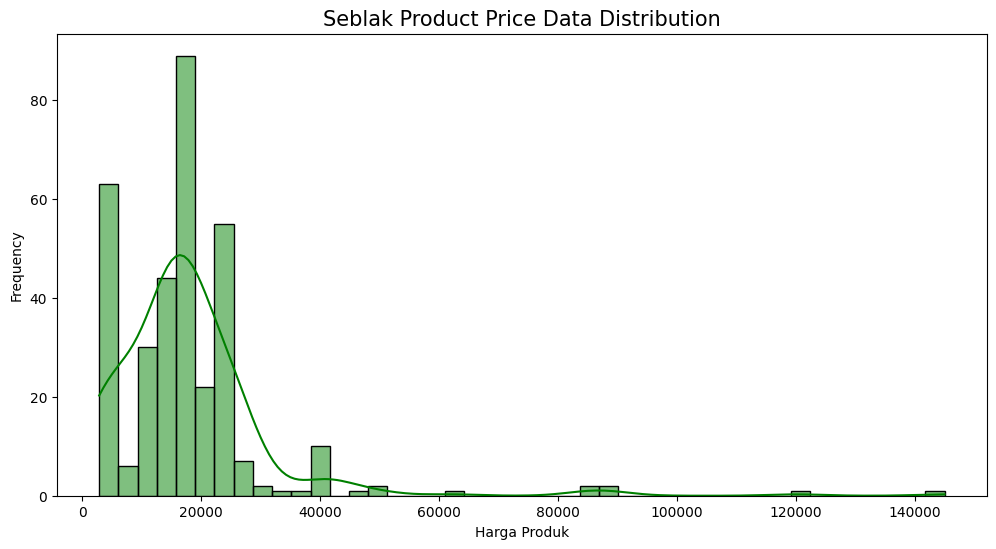

In [32]:
# Create histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['harga_produk'], kde=True, color='green')

# Add labels and title
plt.xlabel('Harga Produk')
plt.ylabel('Frequency')
plt.title(f'Seblak Product Price Data Distribution', fontsize=15)

# Show the plot
plt.show()

* Berdasarkan statistik deskriptif dari kolom harga_produk, diketahui bahwa rerata harga seblak berkisar pada Rp18.033 dengan nilai tengahnya di harga Rp16.000 dan disertai dengan standar deviasi sebesar 14819.76. Melalui perbandingan nilai komponen tersebut, dapat diketahui bahwa data memiliki jarak persebaran yang cukup jauh/luas. Hal ini juga didukung oleh nilai skewness yang bernilai 4.148868001514664 (> 1) atau yang tergolong 'highly skewed' dan nilai kurtosis sebesar 26.224230628574148 (> 0) atau yang tergolong leptokurtic. Dengan demikian, dapat dikatakan bahwa data harga produk memiliki distirbusi yang tidak normal dan cendrung memiliki banyak data outlier.

In [11]:
# kolom jumlah_penjualan
print("Kolom 'jumlah_penjualan'")
print("Mean:", round(df['jumlah_penjualan'].mean(), 2)) # menampilkan rata-rata dan membulatkannya
print("Median:", df['jumlah_penjualan'].median()) # menampilkan median/nilai tengah
print("Standar Deviasi:", round(df['jumlah_penjualan'].std(), 2)) # menampilkan rata-rata dan membulatkannya
print("Skewness:", df['jumlah_penjualan'].skew()) # menampilkan nilai skewness
print("Kurtosis:", df['jumlah_penjualan'].kurtosis()) # menampilkan nilai kurtosis

Kolom 'jumlah_penjualan'
Mean: 1214.46
Median: 250.0
Standar Deviasi: 2575.23
Skewness: 2.8032911707702834
Kurtosis: 6.782808577833659


* Berdasarkan statistik deskriptif dari kolom 'jumlah_penjualan', diketahui bahwa rerata penjualan produk seblak berkisar pada 1214 pcs dengan nilai tengahnya di 250 pcs dan disertai dengan standar deviasi yang tinggi yaitu sebesar 2575.23. Melalui perbandingan nilai komponen tersebut, dapat diketahui bahwa data memiliki jarak persebaran yang jauh/luas. Hal ini juga didukung oleh nilai skewness yang bernilai 2.8032911707702834 (> 1) atau yang tergolong 'highly skewed' dan nilai kurtosis sebesar 6.782808577833659 (> 0) atau yang tergolong leptokurtic. Dengan demikian, dapat dikatakan juga bahwa data jumlah penjualan memiliki distirbusi yang tidak normal dan cendrung memiliki banyak data outlier.

In [12]:
# kolom rating_produk
print("Kolom 'rating_produk'")
print("Mean:", round(df['rating_produk'].mean(), 2)) # menampilkan rata-rata dan membulatkannya
print("Median:", df['rating_produk'].median()) # menampilkan median/nilai tengah
print("Standar Deviasi:", round(df['rating_produk'].std(), 2)) # menampilkan rata-rata dan membulatkannya
print("Skewness:", df['rating_produk'].skew()) # menampilkan nilai skewness
print("Kurtosis:", df['rating_produk'].kurtosis()) # menampilkan nilai kurtosis

Kolom 'rating_produk'
Mean: 4.91
Median: 4.9
Standar Deviasi: 0.08
Skewness: -0.6737871834492707
Kurtosis: 0.5383786152514105


* Berdasarkan statistik deskriptif dari kolom 'rating_produk', diketahui bahwa rerata rating produk seblak berkisar pada nilai 4.91 dengan nilai tengahnya di nilai 4.9 dan disertai dengan standar deviasi yang terbilang rendah yaitu bernilai 0.08. Melalui perbandingan nilai komponen tersebut, dapat diketahui bahwa persebaran data terlihat cukup terpusat (berkisar pada reratanya). Kemudian, data juga memiliki komponen lainnya seperti nilai skewness yang bernilai -0.6737871834492707 (diantara -1 dan -0) atau yang tergolong 'moderately skewed' dengan tipe negative skew, serta nilai kurtosis sebesar 0.5383786152514105 (> 0) atau yang tergolong leptokurtic. Berdasarkan hal tersebut, data rating produk masih dapat dikatakan belum memiliki distirbusi yang normal serta masih berkemungkinan untuk memiliki data outlier meskipun tidak setinggi kemungkinan outlier pada data kolom harga_produk dan jumlah_penjualan.

#### 2.) Potensi minimum dan maksimum pendapatan dari produk seblak

Untuk melihat berapa potensi minimum dan maksimum pendapatan yang diperoleh jika usaha dropship menjual produk seblak, maka pertama yang dilakukan adalah mengetahui pendapatan/omset dari tiap produk, yang bisa dilakukan dengan cara mengalikan harga produk dengan jumlah penjualan produk (informasi penjualan produk merupakan penjualan produk per bulan).

In [50]:
# membuat kolom pendapatan/omset produk seblak
df['omset_produk'] = df['harga_produk'] * df['jumlah_penjualan']

C:\Users\user\AppData\Local\Temp\ipykernel_26948\3272017383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['omset_produk'] = df['harga_produk'] * df['jumlah_penjualan']


In [51]:
max(df['omset_produk'])

180000000

In [52]:
# menghitung confidence interval (dengan asumsi bahwa data terdistribusi normal)
from scipy import stats # package yang berisi berbagai fungsi untuk keperluan analisis statistik
import numpy as np # package yang berisi berbagai fungsi untuk keperluan operasi matematika

std_omset = df['omset_produk'].std() # standar deviasi dari kolom omset_produk
N = len(df['omset_produk']) # panjang data dari kolom omset_produk
low, up = stats.norm.interval(0.95,loc=df['omset_produk'].mean(),scale=std_omset/np.sqrt(N)) # mencari lower dan upper limit menggunakan confidence level 95%

print("Lower Limit:", round(low))
print("upper Limit:",round(up))

Lower Limit: 8421111
upper Limit: 12625293


* Berdasarkan perhitungan confidence interval dengan confidence level 95%, diperoleh lower dan upper limit yang dapat dalam hal ini dapat dianggap sebagai potensi minimum dan maksimum pendapatan (per bulan) dari penjualan produk seblak. Potensi minimum pendapatan penjualan seblak adalah sebesar Rp8.421.111 per bulan, sedangkan Potensi minimum pendapatan penjualan seblak adalah sebesar Rp12.625.293 per bulannya.

#### 3.) Analisa Geographic Trends

Selain mempertimbangkan pendapatan yang akan diperoleh, harga produk seblak yang akan dijual pada usaha dropship nantinya juga perlu untuk dipertimbangkan. Mengingat biaya bahan baku produk, logistik, dan lainnya yang tentunya berbeda untuk setiap daerah.<br>
Dalam hal ini, kita dapat membandingkan harga produk yang dijual di Jabodetabek dan luar Jabodetabek, dikarenakan Jabodetabek sendiri menjadi 5 kawasan metropolitan pusat yang ada di Indonesia.

Untuk menganalisa hal tersebut, kita dapat menerapkan uji hipotesis. Adapun hipotesis yang akan didefinisikan/diuji adalah sebagai berikut:
* H0 = Harga produk di Jabodetabek dan luar Jabodetabek tidak berbeda
* H1 = Harga produk di Jabodetabek dan luar Jabodetabek berbeda

In [16]:
# memeriksa kota apa saja yang tersedia
df['kota'].value_counts()

kota
Tangerang Selatan    71
Depok                62
Jakarta Barat        42
Kab. Garut           26
Jakarta Timur        24
Surakarta            21
Surabaya             21
Bandung              20
Kab. Bandung         15
Jakarta Selatan      10
Cimahi                6
Kab. Tangerang        5
Tangerang             4
Jakarta Pusat         2
Kab. Sidoarjo         2
Semarang              2
Malang                1
Makassar              1
Kab. Bekasi           1
Kab. Sukabumi         1
Tasikmalaya           1
Kab. Sumedang         1
Medan                 1
Name: count, dtype: int64

In [12]:
# melakukan filter data untuk yang jabodetabek dan bukan
jabodetabek = ['Tangerang Selatan', 'Depok', 'Jakarta Barat', 'Jakarta Timur', 'Jakarta Selatan', 'Kab. Tangerang', 'Tangerang', 'Jakarta Pusat', 'Kab. Bekasi']

harga_jabodetabek = df[df['kota'].isin(jabodetabek)][['harga_produk']] # data harga-harga produk di jabodetabek
harga_non_jabodetabek = df[~df['kota'].isin(jabodetabek)][['harga_produk']] # data harga-harga produk di luar jabodetabek

In [16]:
# melihat rerata harga produk di dalam dan luar jabodetabek
mean_jabodetabek = harga_jabodetabek['harga_produk'].mean()
mean_non_jabodetabek = harga_non_jabodetabek['harga_produk'].mean()
print(f"Rerata harga produk di Jabodetabek: {mean_jabodetabek}")
print(f"Rerata harga produk di luar Jabodetabek: {mean_non_jabodetabek}")

Rerata harga produk di Jabodetabek: 17136.592760180996
Rerata harga produk di luar Jabodetabek: 19700.277310924368


C:\Users\user\AppData\Local\Temp\ipykernel_26948\702589225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=["Jabodetabek", "Non Jabodetabek"], y=[mean_jabodetabek, mean_non_jabodetabek], palette=['green', 'lightgreen'])


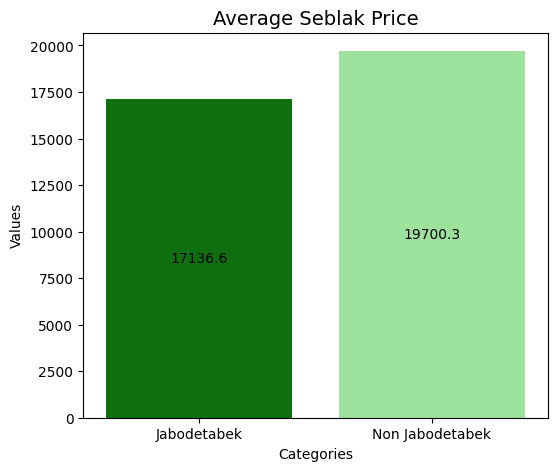

In [47]:
# Create bar plot
plt.figure(figsize=(6,5))
bars = sns.barplot(x=["Jabodetabek", "Non Jabodetabek"], y=[mean_jabodetabek, mean_non_jabodetabek], palette=['green', 'lightgreen'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Average Seblak Price', fontsize=14)

# Add labels inside the bars
for bar, label in zip(bars.patches, [mean_jabodetabek, mean_non_jabodetabek]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, round(label, 1), ha='center', va='center', color='black', fontsize=10)

# Show the plot
plt.show()

Berdasarkan perhitungan rerata, sekilas terlihat bahwa rerata harga produk di luar Jabodetabek lebih tinggi dibandingkan di dalam Jabodetabek. Untuk menguji signifikansi perbedaan harga kedua daerah tersebut, dapat dilanjutkan pada uji hipotesis Two-Sample Independent Test.

In [19]:
# Uji Hipotesis
# Two-Sample Independent Test
t_stat, p_val = stats.ttest_ind(harga_jabodetabek['harga_produk'],harga_non_jabodetabek['harga_produk'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -1.5244029889621575
P-value: 0.1283431610508671


Berdasarkan hasil analisis uji hipotesis, didapat nilai T-Statistic sebesar -1.5244029889621575. Nilai minus (-) pada T-Statistic mengindikasikan bahwa grup 1 memiliki rerata yang lebih kecil dibandingkan grup 2, yang mana dalam hal ini berarti rerata harga produk pada Jabodetabek lebih kecil dibandingkan rerata di luar Jabodetabek. <br><br>
Kemudian didapat juga nilai P-value sebesar 0.1283431610508671 atau > 0.05, sehingga perbedaan rerata harga produk di Jabodetabek dan luar Jabodetabek tidak bisa dianggap signifikan, atau dengan kata lain H0 dapat diterima yaitu "Harga produk di Jabodetabek dan luar Jabodetabek tidak berbeda"

#### 4.) Analisa Korelasi Public Interest dengan Harga Produk

Berikutnya, kita akan menganalisis apakah orang-orang cendrung menyukai produk seblak yang harganya murah atau malah harga produk tidak mempengaruhi ketertarikan tersebut. Hal ini bisa kita analisa melalui korelasi antara harga produk dan nilai rating yang diberikan pelanggan kepada produk tersebut menggunakan metode `Chi-Squared Test`.

Untuk menganalisa hubungan tersebut, hipotesis yang didefinisikan/diuji adalah sebagai berikut:
* H0 = Tidak terdapat hubungan antara harga produk dan rating produk
* H1 = Terdapat hubungan antara harga produk dan rating produk

In [22]:
# Chi-Square Test
cross = pd.crosstab(df['harga_produk'],df['rating_produk']) # mendefinisikan tabel kontingensi/hubungan variabel
pval = stats.chi2_contingency(cross).pvalue
print("P-value:",pval)

P-value: 5.133294870630839e-84


Berdasarkan analisis Chi-Square Test, didapat P-Value sebesar 5.133x10^(-84), yang mana nilai tersebut jauh dibawah critical value (p-value < 0.05). Melalui nilai tersebut, maka H0 ditolak atau dapat disimpulkan bahwa benar terdapat adanya hubungan antara harga produk dan rating produk, yang mana harga produk yang murah cendrung mendapat nilai rating yang tinggi atau lebih disukai.

***

# E. Conclusion

Pada kesimpulannya, terdapat minat masyarakat (Public Interest) yang besar pada produk seblak berdasarkan data penjualan yang ada di website Tokopedia. Hal tersebut dapat terlihat dari banyaknya penjualan yang ada, baik dalam lingkup Jabodetabek maupun luar Jabodetabek. Kemudian untuk sisi bisnis, produk seblak dapat dikatakan cocok untuk menjadi produk dagang/komoditas pada usaha dropship yang akan dibuka, dikarenakan adanya margin potensi pendapatan yang cukup baik dan harga jualnya yang tidak jauh berbeda antara luar dan dalam kawasan pusat (Jabodetabek), sehingga tidak beresiko mengganggu animo masyarakat akan produk dengan harga terjangkau.